# WeatherPy Challenge (OpenWeatherMap API)

---

## Part #1 - Relationship of Weather Variables & Latitude

### Step #1: Dependencies and Setup

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Use 'Sys' library to add the directory where my api key module file is i.e. point to the root folder
import sys
sys.path.append('../')

# Get my OpenWeatherMAP API key from the api_keys module file
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Step #2: Generate List of Cities Using the `citipy` Library

In [2]:
# Empty list to store the latitude-longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Tuple to set the range for Latitude; -90 Deg TO +90 Deg
lat_range = (-90, 90)

# Tuple to set the range for Longitude; -180 Deg TO +180 Deg
lng_range = (-180, 180)


# Generate 1500 latitude random values between -90 and +90 and store in list; Using Numpys' Random function
lats_set = np.random.uniform(lat_range[0], lat_range[1], size = 1500)

# Generate 1500 longitude random values between -180 and +180 and store in list; Using Numpys' Random function
lngs_set = np.random.uniform(lng_range[0], lng_range[1], size = 1500)


# zip lat & lng sets to return an interior of latitude-longitude combination tuples e.g. ((lat1, lng1), (lat2, lng2), ...)
lat_lngs = zip(lats_set, lngs_set)


# For every lat-lng combination in the interior lat-lng tuples...
for lat_lng in lat_lngs:
    
    # From the CitiPy library, return the name of the city closest to the current latitude-longitude combo coordinates
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the retrieved city name is not in the list of cities (i.e. is unique), then add to list
    if city not in cities:
        cities.append(city)

        
# Print Count of Cities from the list to confirm sufficient count (should be well over 500...)
print("----------------------------------")
print(f"No. Cities in the List: {len(cities)}")
print("----------------------------------")

----------------------------------
No. Cities in the List: 619
----------------------------------


### Step #3: Retrieve Weather Data For All Cities in the List (Using OpenWeatherMap API)

In [3]:
# Query Config #1 = Base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Query Config #2 = Unit of Measurement
units = "metric"


# Build partial query URL; used to combine with the city name in the For Loop
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Empty list to store dictionary of weather data for every city; will then be converted into a pd DataFrame once data collected
city_data = []


# Log Commencement of Extracting Weather Data
print("-----------------------------------------")
print("--- Beginning Weather Data Extraction ---")
print("-----------------------------------------")

# Record Counter; indiciates the record number in a set (Used in For Loop)
record_count = 1

# Record Counter; indiciates the set number in a set (Used in For Loop)
set_count = 1

# For every city in the list...
for i, city in enumerate(cities):
        
    # For logging purposes, cities are grouped in sets of 50
    # If 'i' counter is divisible by 50 (i.e. remainder is 0 when divided) and is greater than or equal to 50...
    if (i % 50 == 0 and i >= 50):
        # Iterate Set Counter by 1; indicates new set of 50 city records to be processed
        set_count += 1
        
        # Revert Record Counter back to 1; beginning of the new set
        record_count = 1

    # Create endpoint URL for current city 
    city_url = query_url + city
    
    # Log Current Record / Set / City
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Exception Handling; Try to run an API request for current city
    try:
        # Parse the JSON and retrieve weather data for current city
        city_weather = requests.get(city_url).json()

        # From the JSON Object (Weather Data for Current City)...
        # Extract latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City Weather Attribute Stats (structured as dict) into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If any error is encountered, skip the current city; ends current iteration and moves to the next...
    except:
        print("City Not Found! Skipping...")
        print()
        pass

    
# Log Completion of Weather Data Extraction
print("----------------------------------------")
print("--- Weather Data Extraction Complete ---")
print("----------------------------------------")

-----------------------------------------
--- Beginning Weather Data Extraction ---
-----------------------------------------
Processing Record 1 of Set 1 | isafjordur
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | port lincoln
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | abatskoye
Processing Record 7 of Set 1 | nili
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | chonchi
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | ghanzi
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | ahiri
Processing Record 14 of Set 1 | westport
Processing Record 15 of Set 1 | kone
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | kristiansund
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | west island
Processing Record 21 of Set 1 

City Not Found! Skipping...

Processing Record 40 of Set 4 | west bay
Processing Record 41 of Set 4 | maceio
Processing Record 42 of Set 4 | aasiaat
Processing Record 43 of Set 4 | puerto san carlos
City Not Found! Skipping...

Processing Record 44 of Set 4 | mogocha
Processing Record 45 of Set 4 | barra de santo antonio
Processing Record 46 of Set 4 | mpika
Processing Record 47 of Set 4 | alice springs
Processing Record 48 of Set 4 | georgetown
Processing Record 49 of Set 4 | mounana
Processing Record 50 of Set 4 | badger
Processing Record 1 of Set 5 | roosevelt
Processing Record 2 of Set 5 | marsh harbour
Processing Record 3 of Set 5 | sungai penuh
Processing Record 4 of Set 5 | barrancas
Processing Record 5 of Set 5 | devils lake
Processing Record 6 of Set 5 | geraldton
Processing Record 7 of Set 5 | cole harbour
Processing Record 8 of Set 5 | oneida
Processing Record 9 of Set 5 | santiago
Processing Record 10 of Set 5 | longyearbyen
Processing Record 11 of Set 5 | yarmouth
Processi

Processing Record 32 of Set 8 | nabire
Processing Record 33 of Set 8 | jiazi
Processing Record 34 of Set 8 | eregli
Processing Record 35 of Set 8 | kipushi
Processing Record 36 of Set 8 | tobruk
Processing Record 37 of Set 8 | holualoa
Processing Record 38 of Set 8 | koknese
Processing Record 39 of Set 8 | tanjung selor
City Not Found! Skipping...

Processing Record 40 of Set 8 | arroyo
Processing Record 41 of Set 8 | copala
Processing Record 42 of Set 8 | anda
Processing Record 43 of Set 8 | glace bay
Processing Record 44 of Set 8 | cam ranh
Processing Record 45 of Set 8 | quellon
Processing Record 46 of Set 8 | olinda
Processing Record 47 of Set 8 | usogorsk
Processing Record 48 of Set 8 | lupane
Processing Record 49 of Set 8 | keuruu
Processing Record 50 of Set 8 | groningen
Processing Record 1 of Set 9 | kavieng
Processing Record 2 of Set 9 | nishon tumani
Processing Record 3 of Set 9 | taourirt
Processing Record 4 of Set 9 | inekar
City Not Found! Skipping...

Processing Record 5 

Processing Record 18 of Set 12 | porto novo
Processing Record 19 of Set 12 | kolonia
Processing Record 20 of Set 12 | tralee
Processing Record 21 of Set 12 | nyandoma
Processing Record 22 of Set 12 | ahau
City Not Found! Skipping...

Processing Record 23 of Set 12 | isle of lewis
City Not Found! Skipping...

Processing Record 24 of Set 12 | cromer
Processing Record 25 of Set 12 | jilib
Processing Record 26 of Set 12 | saksaul'skiy
City Not Found! Skipping...

Processing Record 27 of Set 12 | zhenlai
Processing Record 28 of Set 12 | bam
Processing Record 29 of Set 12 | morshyn
Processing Record 30 of Set 12 | ormara
Processing Record 31 of Set 12 | magong
Processing Record 32 of Set 12 | afif
Processing Record 33 of Set 12 | dunhua
Processing Record 34 of Set 12 | tromso
Processing Record 35 of Set 12 | tabou
Processing Record 36 of Set 12 | paracuru
Processing Record 37 of Set 12 | bamboo flat
Processing Record 38 of Set 12 | somerset east
Processing Record 39 of Set 12 | nadym
Process

### Step #4: Migrate City Weather Data to Pandas DataFrame

In [6]:
# Convert the interior City Weather Data Dictionaries into a Pandas DataFrame
cwd_df = pd.DataFrame(city_data)

# Show Count of datapoints in the City Weather DataFrame
cwd_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [7]:
# Display first 5 rows of the City Weather DataFrame
cwd_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isafjordur,66.0755,-23.1240,0.02,93,0,1.03,IS,1698231932
1,blackmans bay,-43.0167,147.3167,7.07,76,45,1.34,AU,1698231934
2,port lincoln,-34.7333,135.8667,11.24,51,14,8.60,AU,1698231934
3,bilibino,68.0546,166.4372,-16.93,99,33,2.02,RU,1698231935
4,new norfolk,-42.7826,147.0587,7.72,82,58,3.49,AU,1698231935


In [ ]:
# Export the City Weather DataFrame into a csv file to the 'output_data' folder
# Avoid needing to make another round of API requests...
cwd_df.to_csv("../output_data/city_weather_data.csv", index_label = "City_ID")

In [8]:
# Read the saved City Weather Data from the CSV file where 'City_ID' column is the index column
cwd_df = pd.read_csv("../output_data/city_weather_data.csv", index_col="City_ID")

# Display first 5 rows of the City Weather DataFrame (via CSV file)
cwd_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,0.02,93,0,1.03,IS,1698231932
1,blackmans bay,-43.0167,147.3167,7.07,76,45,1.34,AU,1698231934
2,port lincoln,-34.7333,135.8667,11.24,51,14,8.60,AU,1698231934
3,bilibino,68.0546,166.4372,-16.93,99,33,2.02,RU,1698231935
4,new norfolk,-42.7826,147.0587,7.72,82,58,3.49,AU,1698231935


In [9]:
# Convert the date values into DateTime & Return only the Date from the 'Date' Column
cwd_df["Date"] = pd.to_datetime(cwd_df["Date"])
cwd_df["Date"] = cwd_df["Date"].dt.date
                                
# Display first 5 rows of the City Weather DataFrame (via CSV file)
cwd_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,0.02,93,0,1.03,IS,1970-01-01
1,blackmans bay,-43.0167,147.3167,7.07,76,45,1.34,AU,1970-01-01
2,port lincoln,-34.7333,135.8667,11.24,51,14,8.60,AU,1970-01-01
3,bilibino,68.0546,166.4372,-16.93,99,33,2.02,RU,1970-01-01
4,new norfolk,-42.7826,147.0587,7.72,82,58,3.49,AU,1970-01-01


### Step #5: Create Scatter Plots

#### Create 'Scatter Plot' Function

In [10]:
# Function to generate scatter plot; saving figure as image and displaying plot is triggered outside the function
def scatter_plot (x_values, y_values, title, x_label, y_label, date) :

    # Adjust plot figure size to be 10 by 6 i.e. (width = 10, height = 6)
    # This needs to be done before creating the plot itself. Otherwise, the plot will not be displayed properly.
    plt.figure(figsize = (10, 6))

    # Create the Scatter Plot using Matplotlib (plt) where...
    # 'x' axis is the passed list of x values
    # 'y' axis is the passed list of x values
    # The plotted point(s) outline colour is White
    # The size of plotted (s) is 50
    plt_scatterplot = plt.scatter(x_values,
                                  y_values,
                                  edgecolor = "black",
                                  s = 50)

    # In the Scatter plot, set a new label for the 'x' axis where Font Size is 14
    plt.xlabel(x_label, fontsize = 14)

    # In the Scatter plot, set a new label for the 'y' axis where Font Size is 14
    plt.ylabel(y_label, fontsize = 14)

    # In the Scatter plot, adjust 'x' tick Font size to 11
    plt.xticks(fontsize = 11)

    # In the Scatter plot, adjust 'y' tick Font size to 11
    plt.yticks(fontsize = 11)

    # In the Scatter plot, set a new title where Font Size is 16
    plt.title(f"{title} ({date})", fontsize = 16)

    # Enable gridlines on plot with 0.5 alpha
    plt.grid(alpha = 0.75)

#### Scatter Plot #1 (Latitude vs. Max Temperature)

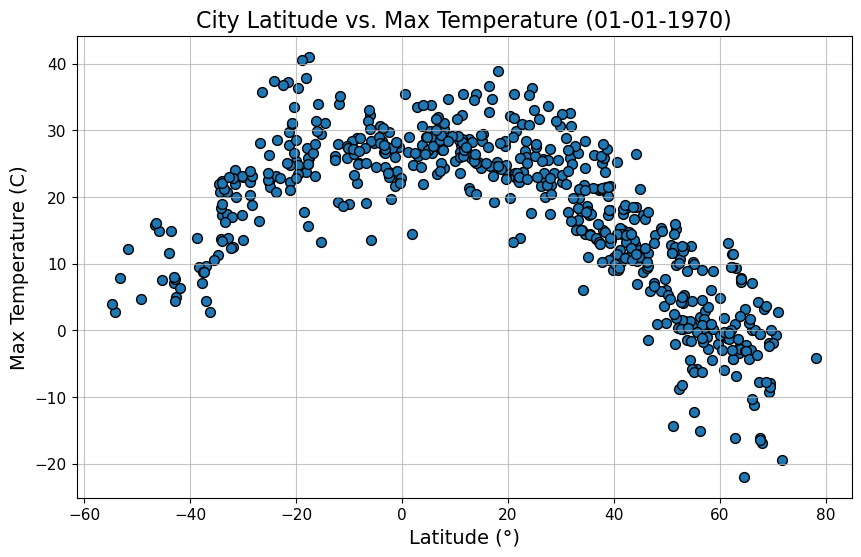

In [11]:
# From the City Weather DataFrame, store all values from the 'Latitude' column in a new list
lat_values = cwd_df.iloc[:,1]

# From the From the City Weather DataFrame, store all values from the 'Max Temp' column in a new list
max_temp_values = cwd_df.iloc[:,3]

# Create title, x axis and y axis label strings for the scatter plot
lat_temp_title = "City Latitude vs. Max Temperature"
lat_label = "Latitude (°)"
max_temp_label = "Max Temperature (C)"

# Get the (only) unique date value from the DataFrame
unique_date = cwd_df['Date'].iloc[0].strftime('%d-%m-%Y')
    
#Generate 'City Latitude vs. Max Temperature' Scatter Plot
scatter_plot(lat_values, max_temp_values, lat_temp_title, lat_label, max_temp_label, unique_date)
    
# Save the Figure
plt.savefig("../output_data/Fig1.png")
    
# Display the Scatter Plot (Using Matplotlib)
plt.show()
    

#### Scatter Plot #2 (Latitude vs. Humidity)

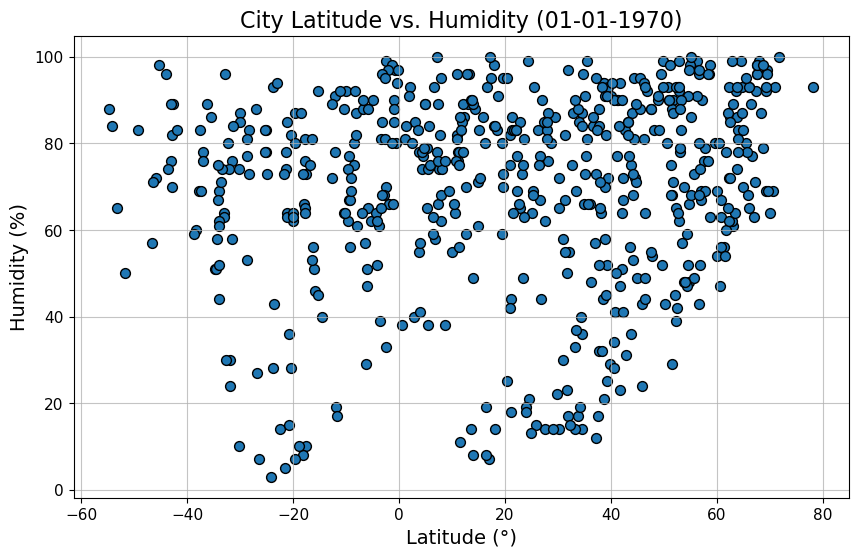

In [12]:
# From the From the City Weather DataFrame, store all values from the 'Humidity' column in a new list
humid_values = cwd_df.iloc[:,4]

# Create title, x axis and y axis label strings for the scatter plot
lat_humid_title = "City Latitude vs. Humidity"
humid_label = "Humidity (%)"

#Generate 'City Latitude vs. Max Humidity' Scatter Plot
scatter_plot(lat_values, humid_values, lat_humid_title, lat_label, humid_label, unique_date)
    
# Save the Figure
plt.savefig("../output_data/Fig2.png")
    
# Display the Scatter Plot (Using Matplotlib)
plt.show()

#### Scatter Plot #3 (Latitude vs. Cloudiness)

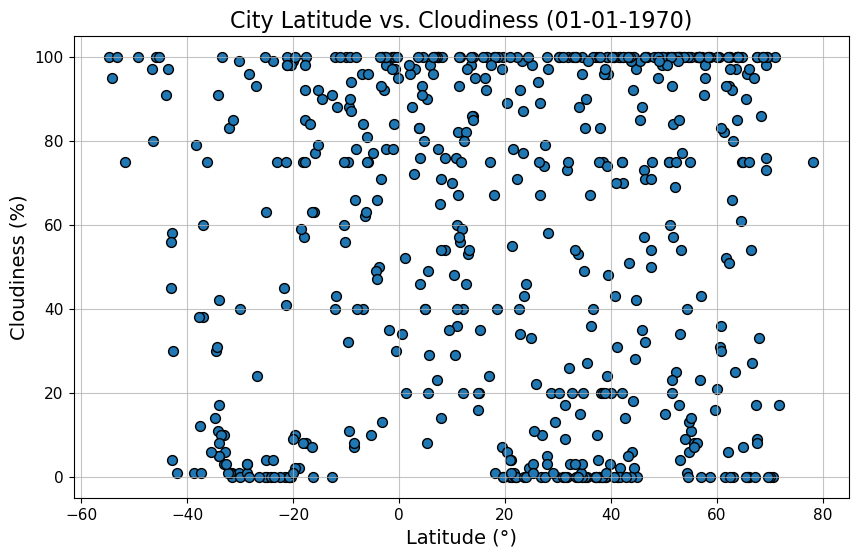

In [13]:
# From the From the City Weather DataFrame, store all values from the 'Cloudiness' column in a new list
cloud_values = cwd_df.iloc[:,5]

# Create title, x axis and y axis label strings for the scatter plot
lat_cloud_title = "City Latitude vs. Cloudiness"
cloud_label = "Cloudiness (%)"

#Generate 'City Latitude vs. Cloudiness' Scatter Plot
scatter_plot(lat_values, cloud_values, lat_cloud_title, lat_label, cloud_label, unique_date)
    
# Save the Figure
plt.savefig("../output_data/Fig3.png")
    
# Display the Scatter Plot (Using Matplotlib)
plt.show()

#### Scatter Plot #4 (Latitude vs. Wind Speed)

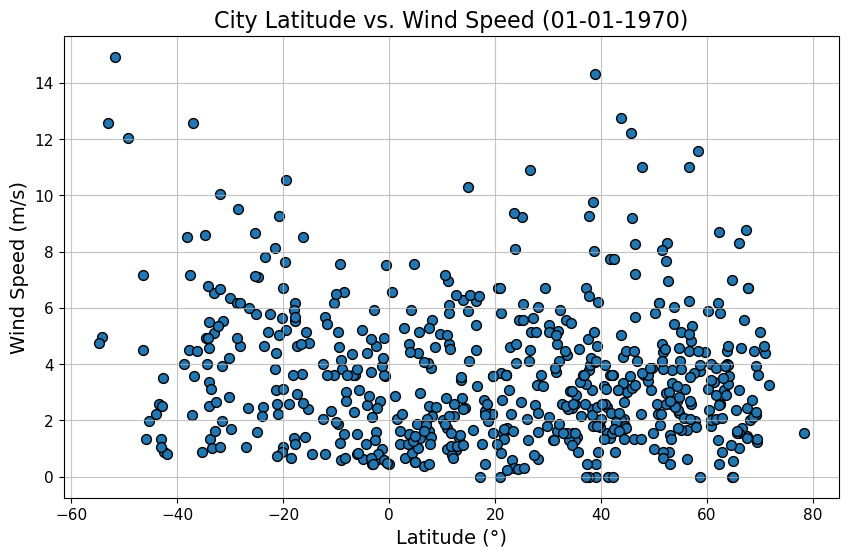

In [14]:
# From the From the City Weather DataFrame, store all values from the 'Cloudiness' column in a new list
wind_values = cwd_df.iloc[:,6]

# Create title, x axis and y axis label strings for the scatter plot
lat_wind_title = "City Latitude vs. Wind Speed"
wind_label = "Wind Speed (m/s)"

#Generate 'City Latitude vs. Cloudiness' Scatter Plot
scatter_plot(lat_values, wind_values, lat_wind_title, lat_label, wind_label, unique_date)
    
# Save the Figure
plt.savefig("../output_data/Fig4.png")
    
# Display the Scatter Plot (Using Matplotlib)
plt.show()

---

## Part #2 - Linear Regression for Each Relationship


### Part 1: Linear Regression Function

In [15]:
# Function to Caluclate Linear Regression for a Target Relationship; Line Equation Annotation occurs outside of this
def linear_regression (x_values, y_values) :
    # Using the SciPy library, perform a linear regression for the target relationship
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the Regression line (y = mx + b) for the target relationship
    # m = slope
    # x = weight_values
    # b = intercept
    regress_values = x_values * slope + intercept

    #Store a string of the regression line formula for current relationship
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot the regression line in the figure
    plt.plot(x_values, regress_values, color = "red")
    
    
    # Log the r-value (Pearson correlation Coefficient)
    print(f"The r-value is: {rvalue}")
    
    return line_eq


### Step #2: Northern / Southern Hemisphere DataFrames

#### Northern Hemisphere DataFrame

In [16]:
# Define mask conditional for Latitude; Northern Hemisphere (greater than or equal to 0 degrees)
north_mask = cwd_df["Lat"] >= 0

# Get all Northern Hemisphere rows from original DataFrame and store in a new DataFrame
north_df = cwd_df[north_mask]

# Display first 5 rows of the Northern Hemisphere DataFrame
north_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,0.02,93,0,1.03,IS,1970-01-01
3,bilibino,68.0546,166.4372,-16.93,99,33,2.02,RU,1970-01-01
5,abatskoye,56.2875,70.4555,1.99,99,100,1.67,RU,1970-01-01
6,nili,33.7218,66.1302,17.83,17,53,1.43,AF,1970-01-01
9,hawaiian paradise park,19.5933,-154.9731,23.91,95,100,1.54,US,1970-01-01


#### Southern Hemisphere DataFrame

In [17]:
# Define mask conditional for Latitude; Southern Hemisphere (less than 0 degrees)
south_mask = cwd_df["Lat"] < 0

# Get all Southern Hemisphere rows from original DataFrame and store in a new DataFrame
south_df = cwd_df[south_mask]

# Display first 5 rows of the Southern Hemisphere DataFrame
south_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,blackmans bay,-43.0167,147.3167,7.07,76,45,1.34,AU,1970-01-01
2,port lincoln,-34.7333,135.8667,11.24,51,14,8.60,AU,1970-01-01
4,new norfolk,-42.7826,147.0587,7.72,82,58,3.49,AU,1970-01-01
7,margaret river,-33.9500,115.0667,17.26,69,42,3.36,AU,1970-01-01
8,chonchi,-42.6128,-73.8092,5.07,89,30,0.87,CL,1970-01-01


### Part 3: Linear Regression Plots

#### Northern Hemisphere: Temperature (C) vs. Latitude

The r-value is: -0.8691664051914325

The r-value and trendline indicates a very strong negative linear relationship between Latitude and Max Temperature.
This also implies an inverse proportionality with high predictability.

i.e. As the Latitiude increases, the Max Temperature decreases in a very predictable manner.


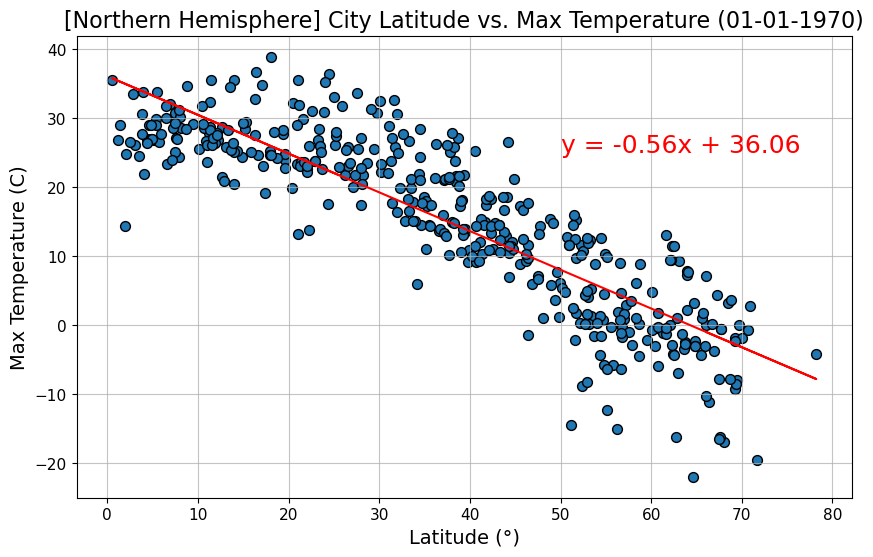

In [18]:
# From the Northern Hemisphere DataFrame, store all values from the 'Latitude' column in a new list
north_lat_values = north_df.iloc[:,1]

# From the From the Northern Hemisphere DataFrame, store all values from the 'Max Temp' column in a new list
north_temp_values = north_df.iloc[:,3]

# Create title string for the scatter plot
north_lat_temp_title = "[Northern Hemisphere] City Latitude vs. Max Temperature"

    
#Generate '[Northern Hemisphere] City Latitude vs. Max Temperature' Scatter Plot
scatter_plot(north_lat_values, north_temp_values, north_lat_temp_title, lat_label, max_temp_label, unique_date)

# Calculate the Linear Regression, plot the line and return the line equation
north_lat_temp_line_eq = linear_regression(north_lat_values, north_temp_values)

# Add the regression line equation in the plot
plt.annotate(north_lat_temp_line_eq, xy = (50,25), fontsize = 18, color  = "red")

print()
print(f"The r-value and trendline indicates a very strong negative linear relationship between Latitude and Max Temperature.")
print(f"This also implies an inverse proportionality with high predictability.")
print()
print(f"i.e. As the Latitiude increases, the Max Temperature decreases in a very predictable manner.")
    
# Display the Scatter Plot (Using Matplotlib)
plt.show()

#### Southern Hemisphere: Temperature (C) vs. Latitude

The r-value is: 0.6756357634841228

The r-value and trendline indicates a mildly positive linear relationship between Latitude and Max Temperature.
This also implies a direct proportionality with some predictability.

i.e. As the Latitiude increases, the Max Temperature increases in some predictable manner.


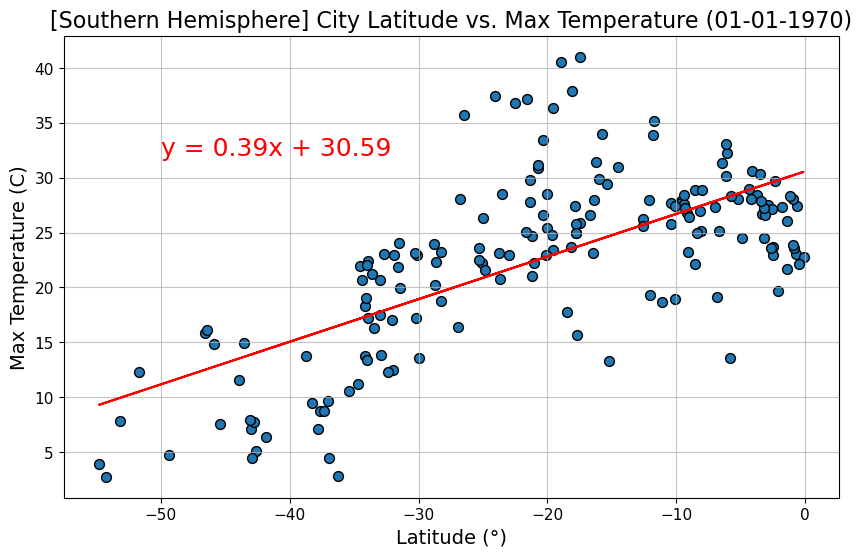

In [19]:
# From the Southern Hemisphere DataFrame, store all values from the 'Latitude' column in a new list
south_lat_values = south_df.iloc[:,1]

# From the From the Southern Hemisphere DataFrame, store all values from the 'Max Temp' column in a new list
south_temp_values = south_df.iloc[:,3]

# Create title string for the scatter plot
south_lat_temp_title = "[Southern Hemisphere] City Latitude vs. Max Temperature"

    
# Generate '[Southern Hemisphere] City Latitude vs. Max Temperature' Scatter Plot
scatter_plot(south_lat_values, south_temp_values, south_lat_temp_title, lat_label, max_temp_label, unique_date)

# Calculate the Linear Regression, plot the line and return the line equation
south_lat_temp_line_eq = linear_regression(south_lat_values, south_temp_values)

# Add the regression line equation in the plot
plt.annotate(south_lat_temp_line_eq, xy = (-50,32), fontsize = 18, color  = "red")

print()
print(f"The r-value and trendline indicates a mildly positive linear relationship between Latitude and Max Temperature.")
print(f"This also implies a direct proportionality with some predictability.")
print()
print(f"i.e. As the Latitiude increases, the Max Temperature increases in some predictable manner.")
    
# Display the Scatter Plot (Using Matplotlib)
plt.show()

#### Northern Hemisphere: Humidity (%) vs. Latitude

The r-value is: 0.14994316743006342

The r-value and trendline indicates a very weak positive linear relationship between Latitude and Humidity.
Since the r-value is close to zero, however, this also implies limited predictability in the overall relationship.

i.e. There is a very limited linear association between Latitiude and Humidity.


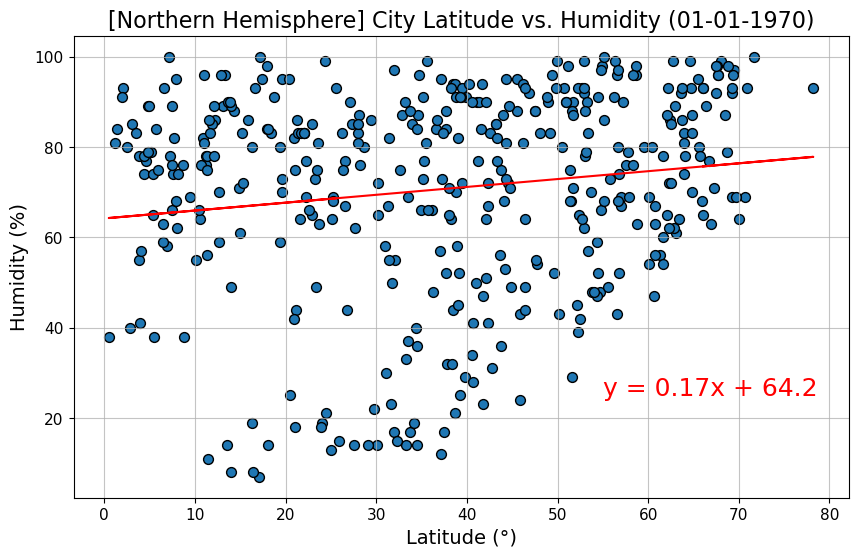

In [21]:
# From the From the Northern Hemisphere DataFrame, store all values from the 'Humidity' column in a new list
north_humid_values = north_df.iloc[:,4]

# Create title string for the scatter plot
north_lat_humid_title = "[Northern Hemisphere] City Latitude vs. Humidity"

    
#Generate '[Northern Hemisphere] City Latitude vs. Humidity' Scatter Plot
scatter_plot(north_lat_values, north_humid_values, north_lat_humid_title, lat_label, humid_label, unique_date)

# Calculate the Linear Regression, plot the line and return the line equation
north_lat_humid_line_eq = linear_regression(north_lat_values, north_humid_values)

# Add the regression line equation in the plot
plt.annotate(north_lat_humid_line_eq, xy = (55,25), fontsize = 18, color  = "red")

print()
print(f"The r-value and trendline indicates a very weak positive linear relationship between Latitude and Humidity.")
print(f"Since the r-value is close to zero, however, this also implies limited predictability in the overall relationship.")
print()
print(f"i.e. There is a very limited linear association between Latitiude and Humidity.")
    
# Display the Scatter Plot (Using Matplotlib)
plt.show()

#### Southern Hemisphere: Humidity (%) vs. Latitude

The r-value is: 0.04478822403381542

The r-value and trendline indicates an extremely weak positive linear relationship between Latitude and Humidity.
Since the r-value is very close to zero, however, this also implies little to no predictability in the relationship.

i.e. There is little to no linear association between Latitiude and Humidity.


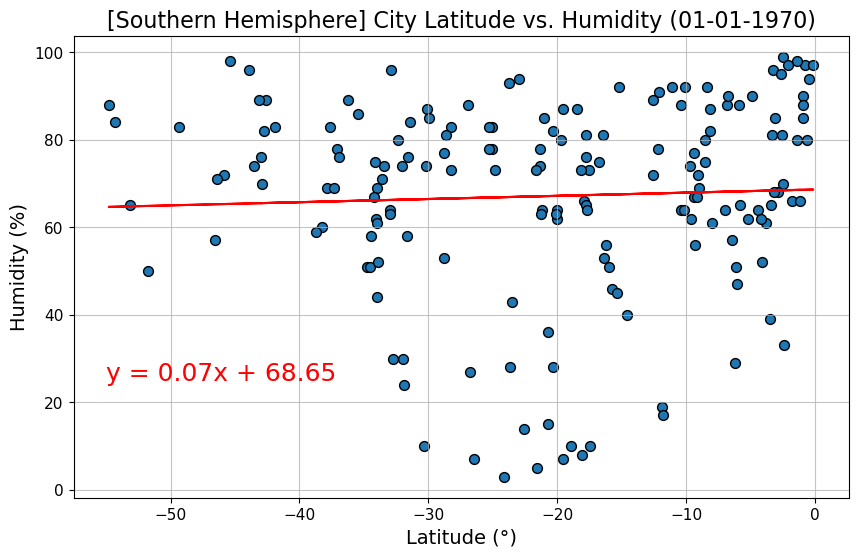

In [22]:
# From the From the Southern Hemisphere DataFrame, store all values from the 'Humidity' column in a new list
south_humid_values = south_df.iloc[:,4]

# Create title string for the scatter plot
south_lat_humid_title = "[Southern Hemisphere] City Latitude vs. Humidity"

    
#Generate '[Southern Hemisphere] City Latitude vs. Humidity' Scatter Plot
scatter_plot(south_lat_values, south_humid_values, south_lat_humid_title, lat_label, humid_label, unique_date)

# Calculate the Linear Regression, plot the line and return the line equation
south_lat_humid_line_eq = linear_regression(south_lat_values, south_humid_values)

# Add the regression line equation in the plot
plt.annotate(south_lat_humid_line_eq, xy = (-55,25), fontsize = 18, color  = "red")

print()
print(f"The r-value and trendline indicates an extremely weak positive linear relationship between Latitude and Humidity.")
print(f"Since the r-value is very close to zero, however, this also implies little to no predictability in the relationship.")
print()
print(f"i.e. There is little to no linear association between Latitiude and Humidity.")
    
# Display the Scatter Plot (Using Matplotlib)
plt.show()

#### Northern Hemisphere: Cloudiness (%) vs. Latitude

The r-value is: 0.021578800421701988

The r-value and trendline indicates an extremely weak positive linear relationship between Latitude and Cloudiness.
Since the r-value is very close to zero, however, this also implies little to no predictability in the relationship.

i.e. There is little to no linear association between Latitiude and Cloudiness.


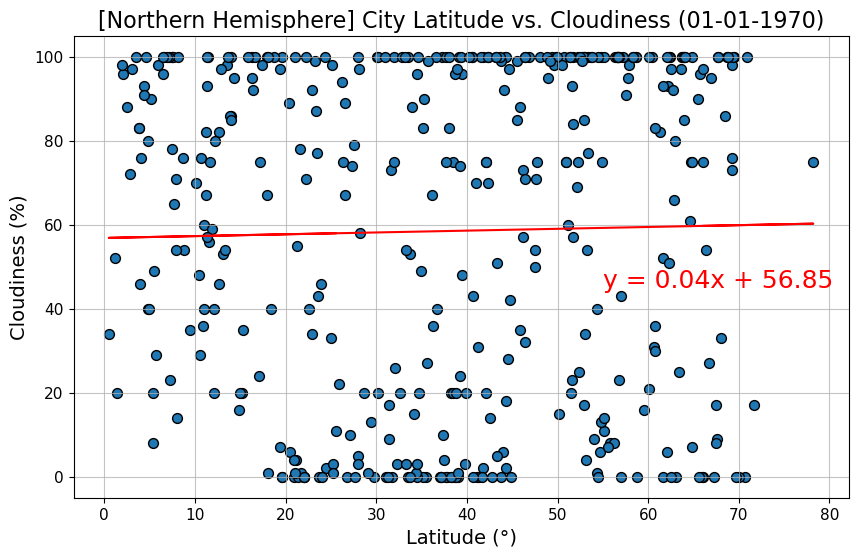

In [23]:
# From the From the Northern Hemisphere DataFrame, store all values from the 'Cloudiness' column in a new list
north_cloud_values = north_df.iloc[:,5]

# Create title string for the scatter plot
north_lat_cloud_title = "[Northern Hemisphere] City Latitude vs. Cloudiness"

    
#Generate '[Northern Hemisphere] City Latitude vs. Cloudiness' Scatter Plot
scatter_plot(north_lat_values, north_cloud_values, north_lat_cloud_title, lat_label, cloud_label, unique_date)

# Calculate the Linear Regression, plot the line and return the line equation
north_lat_cloud_line_eq = linear_regression(north_lat_values, north_cloud_values)

# Add the regression line equation in the plot
plt.annotate(north_lat_cloud_line_eq, xy = (55,45), fontsize = 18, color  = "red")

print()
print(f"The r-value and trendline indicates an extremely weak positive linear relationship between Latitude and Cloudiness.")
print(f"Since the r-value is very close to zero, however, this also implies little to no predictability in the relationship.")
print()
print(f"i.e. There is little to no linear association between Latitiude and Cloudiness.")
    
# Display the Scatter Plot (Using Matplotlib)
plt.show()

#### Southern Hemisphere: Cloudiness (%) vs. Latitude

The r-value is: 0.26645610025583366

The r-value and trendline indicates a weak positive linear relationship between Latitude and Cloudiness.
This also implies a direct proportionality with limited predictability in the overall relationship.

i.e. There is some tendency for both Latitiude and Cloudiness to move in the same direction positively.


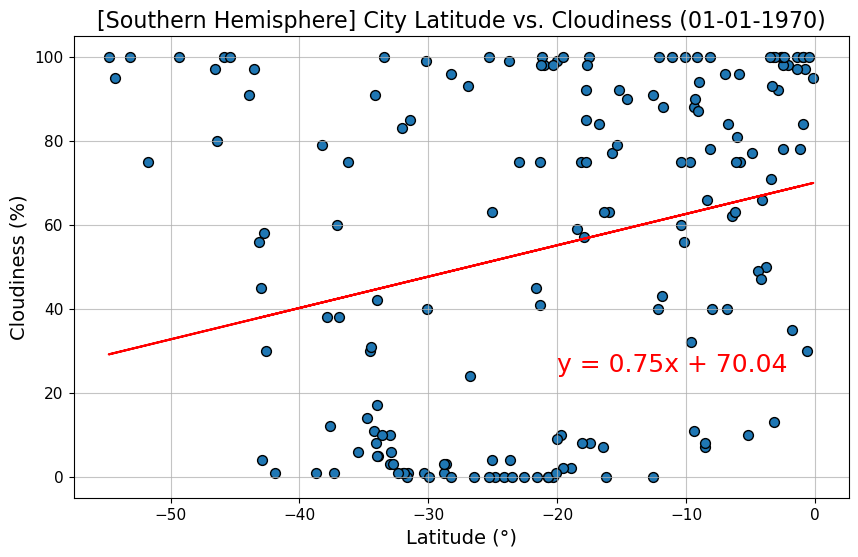

In [24]:
# From the From the Southern Hemisphere DataFrame, store all values from the 'Cloudiness' column in a new list
south_cloud_values = south_df.iloc[:,5]

# Create title string for the scatter plot
south_lat_cloud_title = "[Southern Hemisphere] City Latitude vs. Cloudiness"

    
#Generate '[Southern Hemisphere] City Latitude vs. Cloudiness' Scatter Plot
scatter_plot(south_lat_values, south_cloud_values, south_lat_cloud_title, lat_label, cloud_label, unique_date)

# Calculate the Linear Regression, plot the line and return the line equation
south_lat_cloud_line_eq = linear_regression(south_lat_values, south_cloud_values)

# Add the regression line equation in the plot
plt.annotate(south_lat_cloud_line_eq, xy = (-20,25), fontsize = 18, color  = "red")

print()
print(f"The r-value and trendline indicates a weak positive linear relationship between Latitude and Cloudiness.")
print(f"This also implies a direct proportionality with limited predictability in the overall relationship.")
print()
print(f"i.e. There is some tendency for both Latitiude and Cloudiness to move in the same direction positively.")
    
# Display the Scatter Plot (Using Matplotlib)
plt.show()

#### Northern Hemisphere: Wind Speed (m/s) vs. Latitude

The r-value is: 0.06477326206180496

The r-value and trendline indicates an extremely weak positive linear relationship between Latitude and Windspeed.
Since the r-value is very close to zero, however, this also implies little to no predictability in the relationship.

i.e. There is little to no linear association between Latitiude and Windspeed.


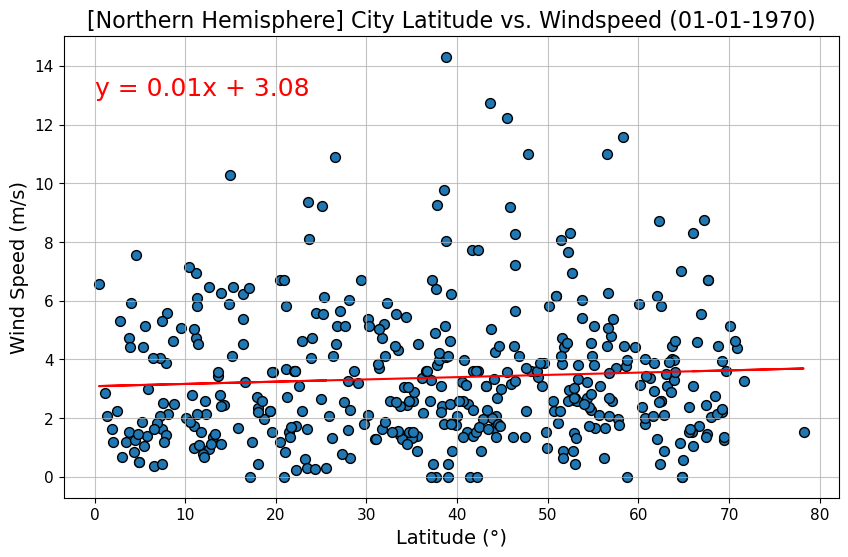

In [25]:
# From the From the Northern Hemisphere DataFrame, store all values from the 'Windspeed' column in a new list
north_wind_values = north_df.iloc[:,6]

# Create title string for the scatter plot
north_lat_wind_title = "[Northern Hemisphere] City Latitude vs. Windspeed"

    
#Generate '[Northern Hemisphere] City Latitude vs. Windspeed' Scatter Plot
scatter_plot(north_lat_values, north_wind_values, north_lat_wind_title, lat_label, wind_label, unique_date)

# Calculate the Linear Regression, plot the line and return the line equation
north_lat_wind_line_eq = linear_regression(north_lat_values, north_wind_values)

# Add the regression line equation in the plot
plt.annotate(north_lat_wind_line_eq, xy = (0,13), fontsize = 18, color  = "red")

print()
print(f"The r-value and trendline indicates an extremely weak positive linear relationship between Latitude and Windspeed.")
print(f"Since the r-value is very close to zero, however, this also implies little to no predictability in the relationship.")
print()
print(f"i.e. There is little to no linear association between Latitiude and Windspeed.")
    
# Display the Scatter Plot (Using Matplotlib)
plt.show()

#### Southern Hemisphere: Wind Speed (m/s) vs. Latitude

The r-value is: -0.3067932662552581

The r-value and trendline indicates a weak negative linear relationship between Latitude and Windspeed.
This also implies an inverse proportionality with limited perdictability in the relationship.

i.e. There is some tendency for the Windspeed to decrease as the Latitude increases.


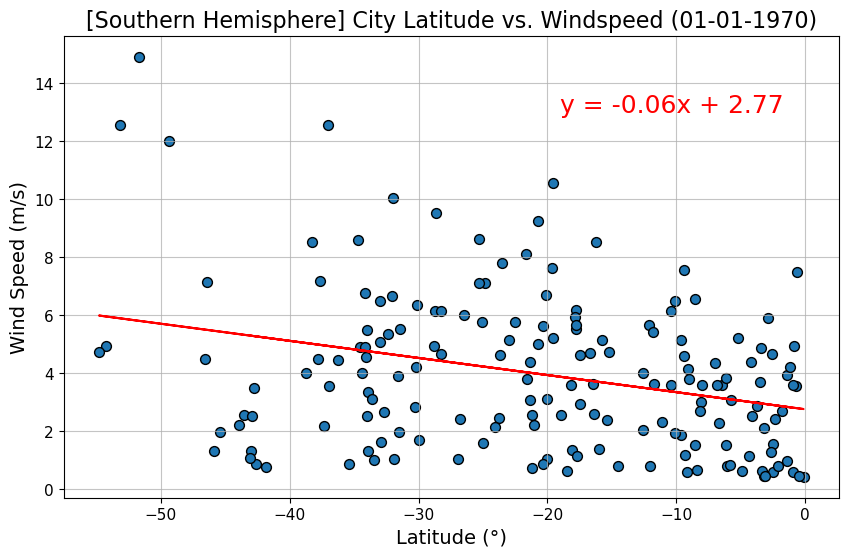

In [26]:
# From the From the Southern Hemisphere DataFrame, store all values from the 'Windspeed' column in a new list
south_wind_values = south_df.iloc[:,6]

# Create title string for the scatter plot
south_lat_wind_title = "[Southern Hemisphere] City Latitude vs. Windspeed"

    
#Generate '[Southern Hemisphere] City Latitude vs. Windspeed' Scatter Plot
scatter_plot(south_lat_values, south_wind_values, south_lat_wind_title, lat_label, wind_label, unique_date)

# Calculate the Linear Regression, plot the line and return the line equation
south_lat_wind_line_eq = linear_regression(south_lat_values, south_wind_values)

# Add the regression line equation in the plot
plt.annotate(south_lat_wind_line_eq, xy = (-19,13), fontsize = 18, color  = "red")

print()
print(f"The r-value and trendline indicates a weak negative linear relationship between Latitude and Windspeed.")
print(f"This also implies an inverse proportionality with limited perdictability in the relationship.")
print()
print(f"i.e. There is some tendency for the Windspeed to decrease as the Latitude increases.")
    
# Display the Scatter Plot (Using Matplotlib)
plt.show()